In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from scipy.stats import zscore,boxcox
import warnings
warnings.filterwarnings('ignore')

In [2]:
ab=pd.read_csv('abalone.csv',names=('sex','longest shell','dia of shell','hg of shell','wg of abalone','wg of meat','gut wg(after bleeding)','shell wg(after drying)'
,'no of rings'),header=0)
ab

,sex,longest shell,dia of shell,hg of shell,wg of abalone,wg of meat,gut wg(after bleeding),shell wg(after drying),no of rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
ab['age']=ab['no of rings']+1.5

In [4]:
ab

,sex,longest shell,dia of shell,hg of shell,wg of abalone,wg of meat,gut wg(after bleeding),shell wg(after drying),no of rings,age
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8,9.5
...,...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [5]:
ab.columns.values

array(['sex', 'longest shell', 'dia of shell', 'hg of shell',
       'wg of abalone', 'wg of meat', 'gut wg(after bleeding)',
       'shell wg(after drying)', 'no of rings', 'age'], dtype=object)

In [6]:
ab.shape

(4176, 10)

In [7]:
ab.head(7)

,sex,longest shell,dia of shell,hg of shell,wg of abalone,wg of meat,gut wg(after bleeding),shell wg(after drying),no of rings,age
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,9.5
5,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,21.5
6,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,17.5


In [8]:
ab.tail(7)

,sex,longest shell,dia of shell,hg of shell,wg of abalone,wg of meat,gut wg(after bleeding),shell wg(after drying),no of rings,age
4169,M,0.550,0.430,0.130,0.8395,0.3155,0.1955,0.2405,10,11.5
4170,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8,9.5
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5
4175,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12,13.5


In [9]:
ab.min()

sex                            F
longest shell              0.075
dia of shell               0.055
hg of shell                    0
wg of abalone              0.002
wg of meat                 0.001
gut wg(after bleeding)    0.0005
shell wg(after drying)    0.0015
no of rings                    1
age                          2.5
dtype: object

In [10]:
ab.max()

sex                            M
longest shell              0.815
dia of shell                0.65
hg of shell                 1.13
wg of abalone             2.8255
wg of meat                 1.488
gut wg(after bleeding)      0.76
shell wg(after drying)     1.005
no of rings                   29
age                         30.5
dtype: object

In [11]:
ab.std()

longest shell             0.120103
dia of shell              0.099250
hg of shell               0.041826
wg of abalone             0.490424
wg of meat                0.221980
gut wg(after bleeding)    0.109620
shell wg(after drying)    0.139213
no of rings               3.223601
age                       3.223601
dtype: float64

In [12]:
ab.mean()

longest shell              0.524009
dia of shell               0.407892
hg of shell                0.139527
wg of abalone              0.828818
wg of meat                 0.359400
gut wg(after bleeding)     0.180613
shell wg(after drying)     0.238852
no of rings                9.932471
age                       11.432471
dtype: float64

In [13]:
ab.median()

longest shell              0.54500
dia of shell               0.42500
hg of shell                0.14000
wg of abalone              0.79975
wg of meat                 0.33600
gut wg(after bleeding)     0.17100
shell wg(after drying)     0.23400
no of rings                9.00000
age                       10.50000
dtype: float64

In [14]:
ab.dtypes

sex                        object
longest shell             float64
dia of shell              float64
hg of shell               float64
wg of abalone             float64
wg of meat                float64
gut wg(after bleeding)    float64
shell wg(after drying)    float64
no of rings                 int64
age                       float64
dtype: object

In [15]:
ab.isnull().sum()

sex                       0
longest shell             0
dia of shell              0
hg of shell               0
wg of abalone             0
wg of meat                0
gut wg(after bleeding)    0
shell wg(after drying)    0
no of rings               0
age                       0
dtype: int64

#no trace of no null values 

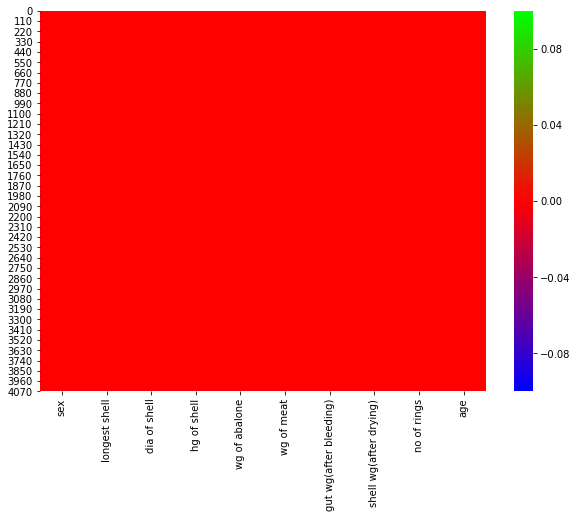

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(ab.isnull(),cmap='brg')

In [17]:
ab.duplicated(keep='first').sum()
#checking for duplicat rows to drop

0

showing no trace of duplicated values

In [18]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 10 columns):
sex                       4176 non-null object
longest shell             4176 non-null float64
dia of shell              4176 non-null float64
hg of shell               4176 non-null float64
wg of abalone             4176 non-null float64
wg of meat                4176 non-null float64
gut wg(after bleeding)    4176 non-null float64
shell wg(after drying)    4176 non-null float64
no of rings               4176 non-null int64
age                       4176 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.4+ KB


In [19]:
ab.describe()

,longest shell,dia of shell,hg of shell,wg of abalone,wg of meat,gut wg(after bleeding),shell wg(after drying),no of rings,age
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471,11.432471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000,30.500000


In [20]:
o=['object']
ab.describe(include=o)
#checking the summary statistics of all the object datatypes present in the dataset

,sex
count,4176
unique,3
top,M
freq,1527


'sex' column i the only column with object dtype.
it's showing a total of 4176 element in the column with three unique values i.e. Male/Female/Infant. where Male(M) is the maximum occuring value with a occurance of 1527 number.

In [21]:
for i in ab.columns:
    x=ab[i].value_counts()
    print('_________________________________\n The value count of',i,'is:-\n', x )
    #it will give the value of the attribute and the numbers of abalone corresonding to that value.

_________________________________
 The value count of sex is:-
 M    1527
I    1342
F    1307
Name: sex, dtype: int64
_________________________________
 The value count of longest shell is:-
 0.625    94
0.550    94
0.575    93
0.580    92
0.620    87
         ..
0.075     1
0.800     1
0.110     1
0.815     1
0.150     1
Name: longest shell, Length: 134, dtype: int64
_________________________________
 The value count of dia of shell is:-
 0.450    139
0.475    120
0.400    111
0.500    110
0.470    100
        ... 
0.615      1
0.620      1
0.625      1
0.090      1
0.095      1
Name: dia of shell, Length: 111, dtype: int64
_________________________________
 The value count of hg of shell is:-
 0.150    267
0.140    220
0.155    217
0.175    211
0.160    205
0.125    202
0.165    193
0.135    189
0.145    182
0.130    169
0.120    169
0.170    160
0.100    145
0.110    135
0.115    133
0.180    131
0.090    124
0.105    114
0.185    103
0.190    103
0.095     90
0.195     78
0.080    

In [22]:
ab.groupby(ab['sex']).mean()
#checking the mean values of each columns and grouping them by 'sex'

,longest shell,dia of shell,hg of shell,wg of abalone,wg of meat,gut wg(after bleeding),shell wg(after drying),no of rings,age
sex,,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304,12.629304
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462,9.390462
M,0.561460,0.439335,0.151418,0.991772,0.433083,0.215620,0.282056,10.702685,12.202685


In [23]:
pd.crosstab(ab['sex'],ab['age'])

age,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,...,20.5,21.5,22.5,23.5,24.5,25.5,26.5,27.5,28.5,30.5
sex,,,,,,,,,,,,,,,,,,,,,
F,0,0,0,0,4,16,44,122,238,248,...,15,12,7,3,6,1,1,0,1,1
I,1,1,12,51,100,216,267,274,173,92,...,2,2,1,0,0,0,0,0,0,0
M,0,0,3,6,11,27,80,172,278,294,...,15,12,6,3,3,1,0,1,1,0


In [24]:
for i in ab.columns:
    ctab=pd.crosstab(ab[i],ab['sex']).head(30)
    print('_____________________________________________\nthe value count of',i,'against given AGE range are:- \n',ctab)
#generating a crosstabulation of all attribute wrt sex column so check the frequency of all attribute and displaying the first 30 values

_____________________________________________
the value count of sex against given AGE range are:- 
 sex     F     I     M
sex                  
F    1307     0     0
I       0  1342     0
M       0     0  1527
_____________________________________________
the value count of longest shell against given AGE range are:- 
 sex            F   I  M
longest shell          
0.075          0   1  0
0.110          0   1  0
0.130          0   2  0
0.135          0   1  0
0.140          0   2  0
0.150          0   1  0
0.155          0   1  2
0.160          0   4  0
0.165          0   4  1
0.170          0   3  0
0.175          0   3  2
0.180          0   3  1
0.185          0   4  0
0.190          0   4  0
0.195          0   2  1
0.200          0   5  1
0.205          0   4  1
0.210          0   5  1
0.215          0   5  0
0.220          0   2  0
0.225          0   4  0
0.230          0   4  0
0.235          0   8  2
0.240          0   7  0
0.245          0   5  1
0.250          0   8  0
0.255 

Text(0.5, 1.0, 'COUNTPLOT FOR SEX TO VISUALIZE THE NUMBERS OF DIFFERENT CATEGORY')

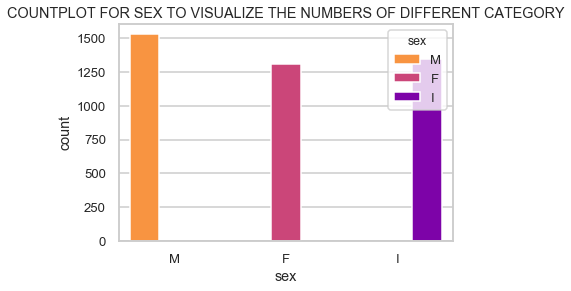

In [25]:
#countplot for sex
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=0.8)
sns.countplot(x='sex',data=ab,hue='sex',saturation=9,palette='plasma_r')
plt.title('COUNTPLOT FOR SEX TO VISUALIZE THE NUMBERS OF DIFFERENT CATEGORY')

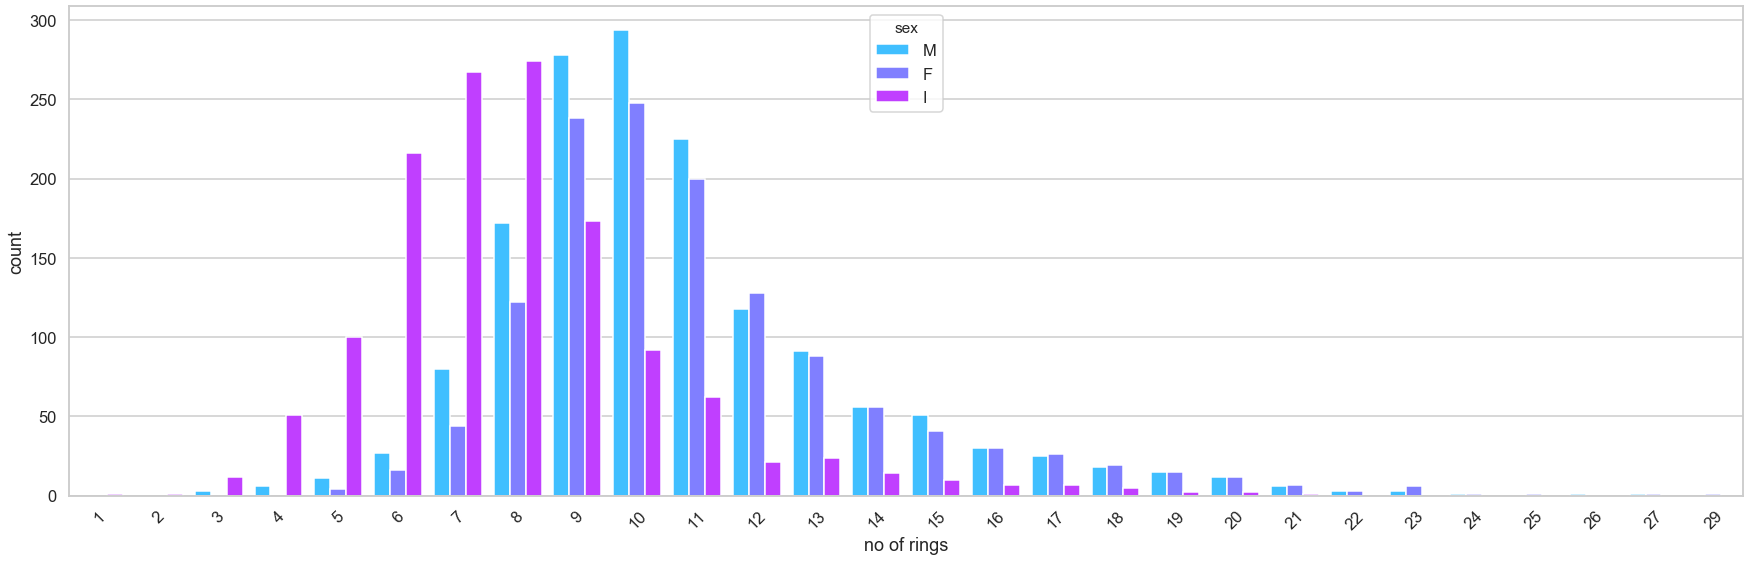

In [26]:
plt.figure(figsize=(30,9))
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=1)
cplt=sns.countplot(x='no of rings',hue='sex',data=ab,saturation=12,palette='cool',color='navy')
cplt.set_xticklabels(cplt.get_xticklabels(),rotation=45)
plt.show()

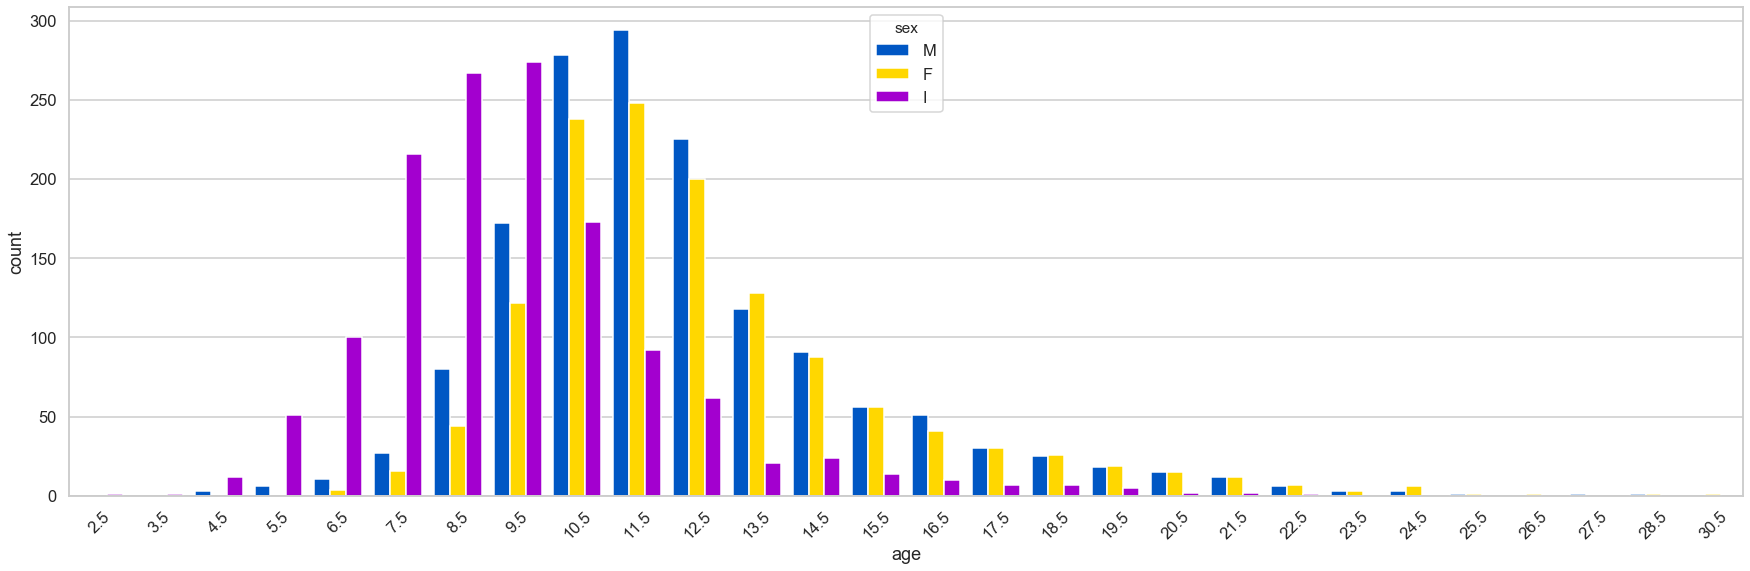

In [27]:
plt.figure(figsize=(30,9))
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=1)
cplt=sns.countplot(x='age',hue='sex',data=ab,saturation=12,palette='prism',color='darkorange')
cplt.set_xticklabels(cplt.get_xticklabels(),rotation=45)
plt.show()

In [28]:
lb=LabelEncoder()
ab['sex']=lb.fit_transform(ab['sex'])
#using label encoder to transform the object data of 'SEX' to a numerical form 

by using label encoder it transform M,F,I as 
M=2,F=0,I=1

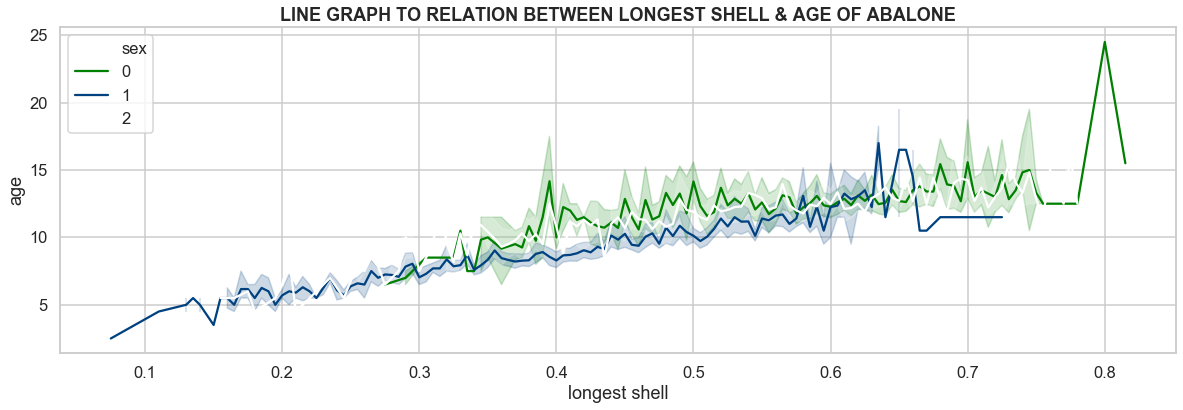

In [29]:
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=1)
plt.figure(figsize=(20,6))
sns.lineplot(x='longest shell',y='age',hue='sex',data=ab,palette='ocean',dashes=True)
plt.title('LINE GRAPH TO RELATION BETWEEN LONGEST SHELL & AGE OF ABALONE',weight='bold')
plt.show()      

the above plotting showing a increase in the size of the longest shell with increase in age and the shell size of a full grown female is the longest among all.

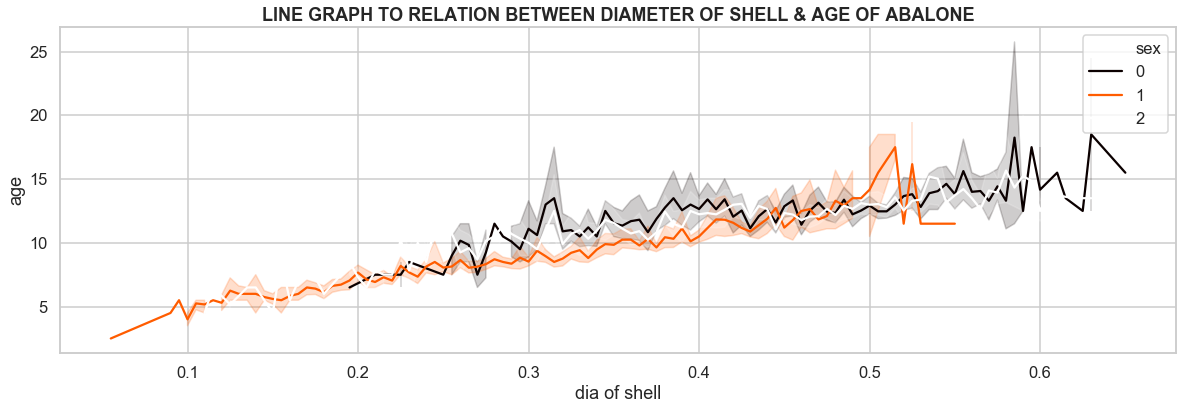

In [30]:
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=1)
plt.figure(figsize=(20,6))
sns.lineplot(x='dia of shell',y='age',hue='sex',data=ab,palette='hot',dashes=True)
plt.title('LINE GRAPH TO RELATION BETWEEN DIAMETER OF SHELL & AGE OF ABALONE',weight='bold')
plt.show()       

the above plotting showing a increase in the dia of the shell increases with increase in age and the dia of shell of a full grown female is the highest among all.

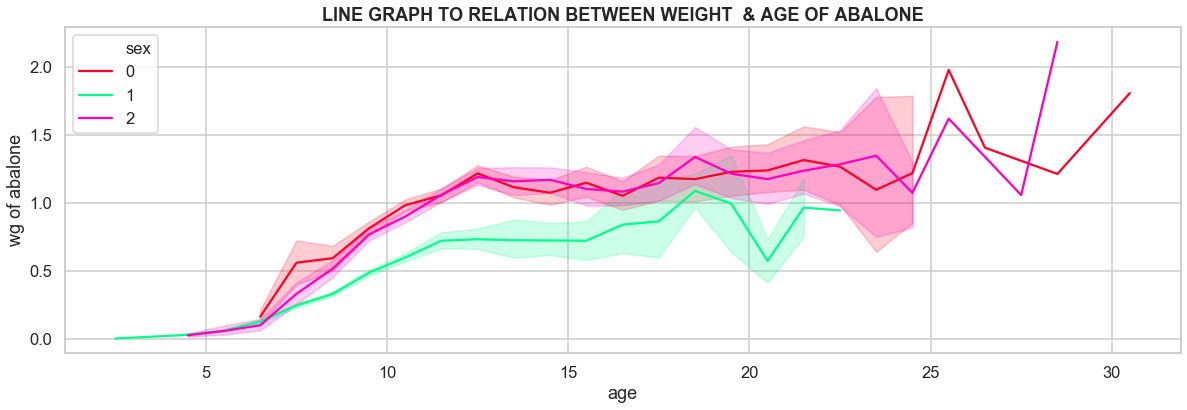

In [31]:
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=1)
plt.figure(figsize=(20,6))
sns.lineplot(y='wg of abalone',x='age',hue='sex',data=ab,palette='gist_rainbow',dashes=True)
plt.title('LINE GRAPH TO RELATION BETWEEN WEIGHT  & AGE OF ABALONE',weight='bold')
plt.show()       

the above plotting showing a increase in the weight of abalone increases with increase in age and the weight of a full grown male is the highest among all.

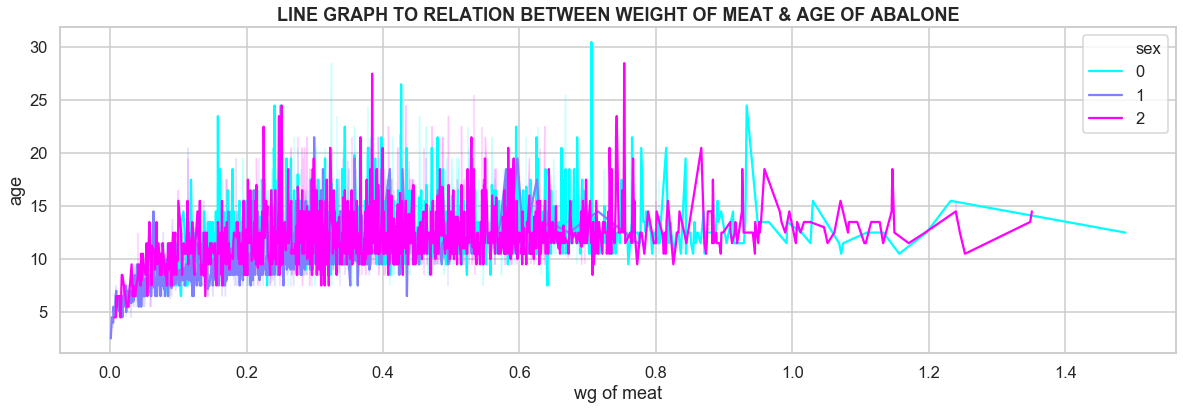

In [32]:
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=1)
plt.figure(figsize=(20,6))
sns.lineplot(x='wg of meat',y='age',hue='sex',data=ab,palette='cool',dashes=True)
plt.title('LINE GRAPH TO RELATION BETWEEN WEIGHT OF MEAT & AGE OF ABALONE',weight='bold')
plt.show()       

the above plotting showing that the weight of meat increases with increase in age. the max meat obtained from female abalone

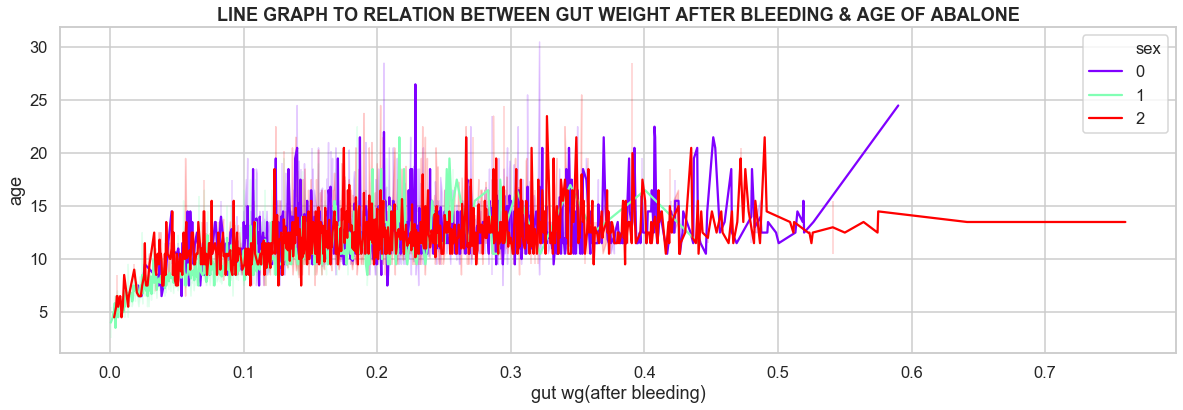

In [33]:
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=1)
plt.figure(figsize=(20,6))
sns.lineplot(x='gut wg(after bleeding)',y='age',hue='sex',data=ab,palette='rainbow',dashes=True)
plt.title('LINE GRAPH TO RELATION BETWEEN GUT WEIGHT AFTER BLEEDING & AGE OF ABALONE',weight='bold')
plt.show()       

the gut of weight female abalone is high after bleeding

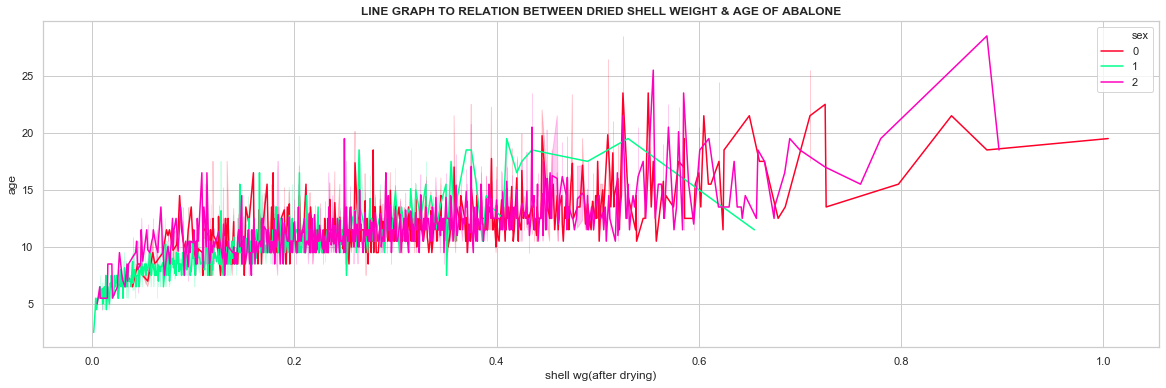

In [34]:
sns.set(style='whitegrid')
plt.figure(figsize=(20,6))
sns.lineplot(x='shell wg(after drying)',y='age',hue='sex',data=ab,palette='gist_rainbow',dashes=True)
plt.title('LINE GRAPH TO RELATION BETWEEN DRIED SHELL WEIGHT & AGE OF ABALONE',weight='bold')
plt.show()      

the above plot shows that the weight of  dried shell increases with age but the dried shell weight of a full grown male of  is the highest among all 

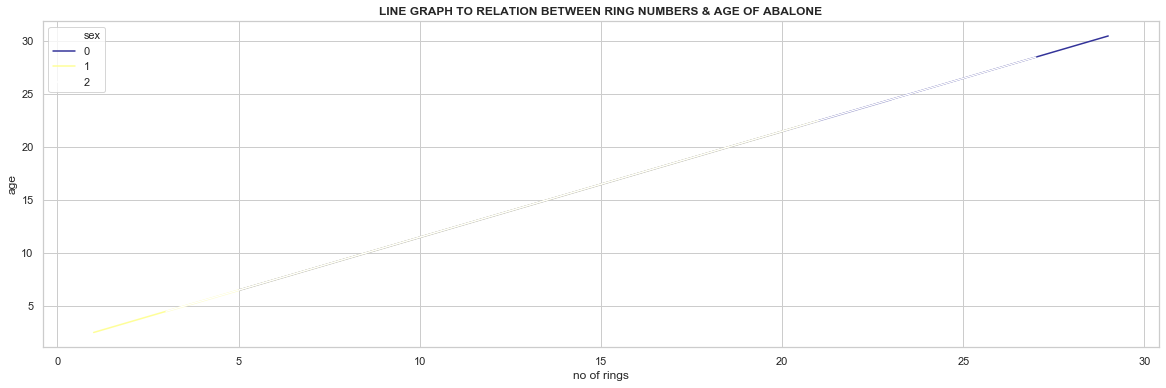

In [35]:
sns.set(style='whitegrid')
plt.figure(figsize=(20,6))
sns.lineplot(x='no of rings',y='age',hue='sex',data=ab,palette='terrain',dashes=True)
plt.title('LINE GRAPH TO RELATION BETWEEN RING NUMBERS & AGE OF ABALONE',weight='bold')
plt.show()      

the above plot shows a increase in number of ring with increase in age of all abalone but a female has max number of ring

In [36]:
#outlier removal

In [37]:
abln=ab.columns.values
abln

array(['sex', 'longest shell', 'dia of shell', 'hg of shell',
       'wg of abalone', 'wg of meat', 'gut wg(after bleeding)',
       'shell wg(after drying)', 'no of rings', 'age'], dtype=object)

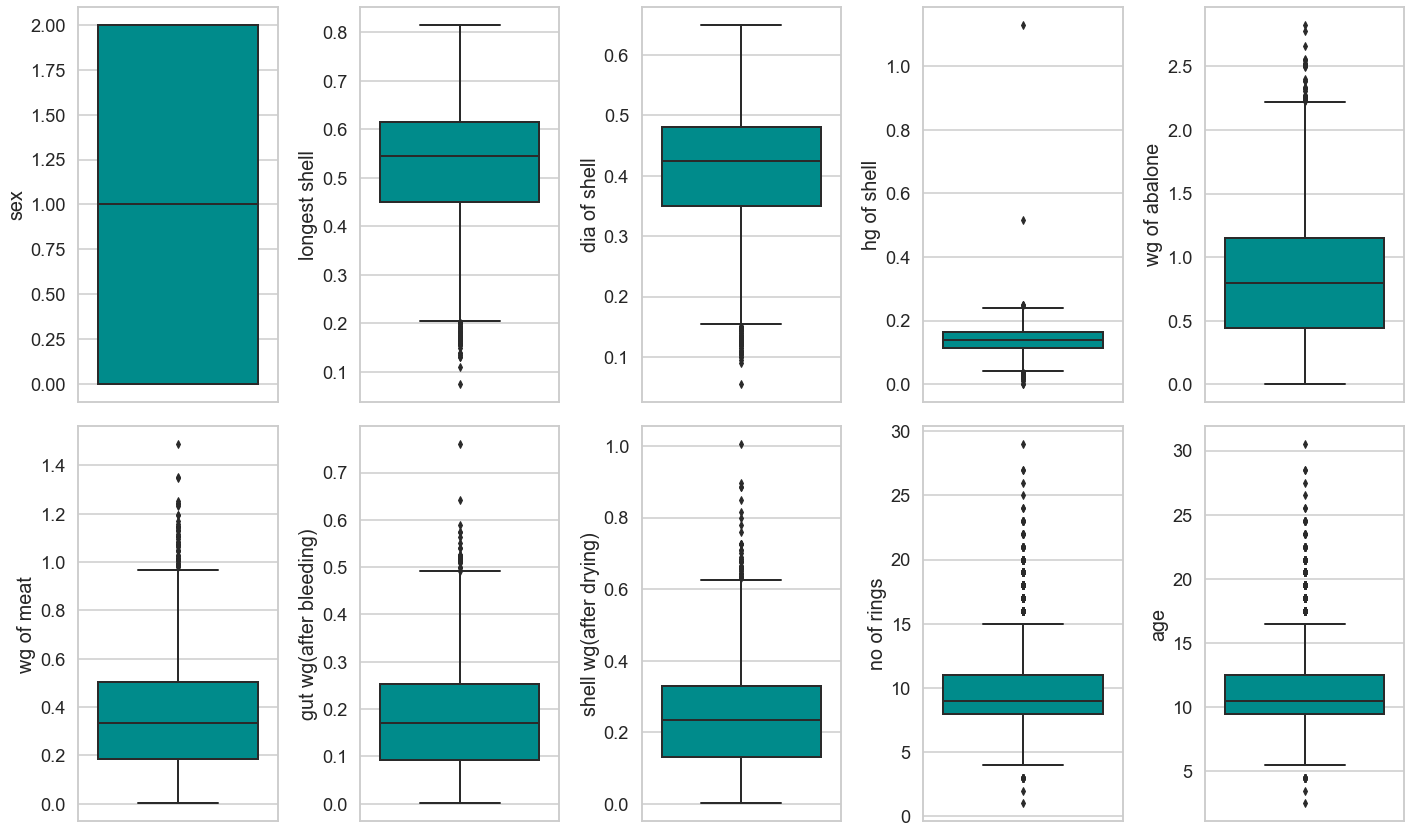


		 plotting boxplot to check presence of outliers in attributes of the dataset


In [38]:
plt.figure(figsize=(20,12))
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=1.1)

for i in range(10):
    plt.subplot(2,5,i+1)
    sns.boxplot(ab[abln[i]],color='darkcyan',orient='v',saturation=18,linewidth=2) 
plt.tight_layout()   
plt.show()
print('\n\t\t plotting boxplot to check presence of outliers in attributes of the dataset')

In [39]:
z=np.abs(zscore(ab))
z

array([[1.15230114, 1.44900723, 1.43989229, ..., 1.21305408, 0.90979684,
        0.90979684],
       [1.28046405, 0.0498915 , 0.12201495, ..., 0.20727719, 0.28929846,
        0.28929846],
       [1.15230114, 0.69955786, 0.4322102 , ..., 0.60240383, 0.02095074,
        0.02095074],
       ...,
       [1.15230114, 0.63279657, 0.67624011, ..., 0.49676663, 0.28929846,
        0.28929846],
       [1.28046405, 0.84097695, 0.77700832, ..., 0.41055718, 0.02095074,
        0.02095074],
       [1.15230114, 1.54879024, 1.48238578, ..., 1.84019719, 0.64144912,
        0.64144912]])

In [40]:
print(np.where(z>3))

(array([   5,    5,   71,   71,   80,   82,   82,  128,  162,  163,  164,
        164,  164,  165,  165,  165,  166,  166,  167,  169,  180,  180,
        231,  231,  235,  235,  235,  236,  236,  237,  237,  238,  269,
        269,  274,  274,  276,  277,  277,  293,  293,  309,  309,  312,
        312,  313,  313,  333,  350,  350,  354,  354,  357,  357,  361,
        361,  374,  374,  415,  415,  416,  416,  427,  427,  430,  430,
        432,  432,  468,  468,  477,  477,  479,  479,  500,  500,  525,
        525,  529,  529,  571,  571,  627,  627,  672,  672,  673,  673,
        674,  674,  677,  677,  693,  695,  695,  718,  718,  719,  719,
        743,  743,  753,  753,  755,  755,  810,  810,  890,  890,  890,
       1047, 1050, 1050, 1051, 1192, 1196, 1198, 1201, 1203, 1205, 1205,
       1206, 1206, 1206, 1206, 1208, 1208, 1256, 1416, 1416, 1417, 1421,
       1425, 1426, 1426, 1426, 1427, 1428, 1428, 1527, 1753, 1755, 1756,
       1758, 1760, 1761, 1761, 1761, 1762, 1762, 1

In [41]:
#checking some outlier values
print(z[4147][6], '\n',z[3148][8])

3.15113357021976 
 4.364439430977214


In [42]:
abel=ab[(z<3).all(axis=1)]
abel

,sex,longest shell,dia of shell,hg of shell,wg of abalone,wg of meat,gut wg(after bleeding),shell wg(after drying),no of rings,age
0,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
2,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
3,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
4,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8,9.5
...,...,...,...,...,...,...,...,...,...,...
4171,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4172,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4173,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4174,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [43]:
print(' the shape of abalone dataset with outliers was:',ab.shape,'\n the new shape of abalone dataset after outlier removal is:',abel.shape) 

 the shape of abalone dataset with outliers was: (4176, 10) 
 the new shape of abalone dataset after outlier removal is: (4026, 10)


so a total of 150 rows carrying outliers were eliminated

In [44]:
#checking for skewness:

In [45]:
cl=abel.columns.values
cl

array(['sex', 'longest shell', 'dia of shell', 'hg of shell',
       'wg of abalone', 'wg of meat', 'gut wg(after bleeding)',
       'shell wg(after drying)', 'no of rings', 'age'], dtype=object)

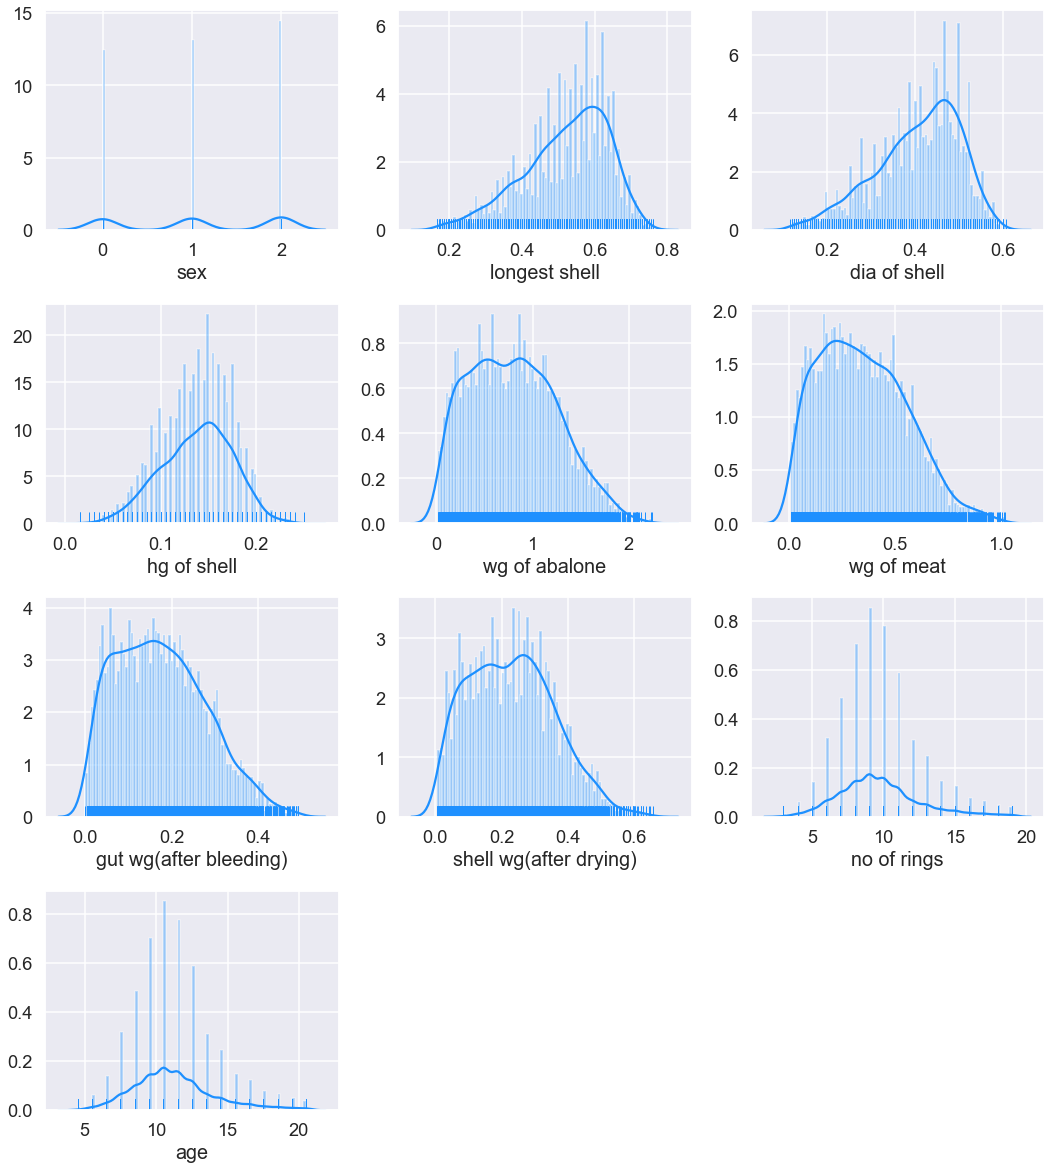

In [46]:
plt.figure(figsize=(15,20))
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=1.1)
for i in range (0, 10):
    plt.subplot(5,3,i+1)
    sns.distplot(abel[cl[i]], color='dodgerblue', bins=80,kde=True,rug=True)
    plt.tight_layout()

In [47]:
abel.skew()

sex                      -0.094445
longest shell            -0.623453
dia of shell             -0.598910
hg of shell              -0.244820
wg of abalone             0.333803
wg of meat                0.457905
gut wg(after bleeding)    0.436702
shell wg(after drying)    0.349071
no of rings               0.726115
age                       0.726115
dtype: float64

In [48]:
#skew of 0.55 is allowable so any attribute having skew value more than 0.55 will be treated as skewed data and that must be removed.
for i in abel.columns:
    if abel.skew().loc[i]>0.55:
        abel[i]=np.log1p(abel[i])
print(abel.skew())  

sex                      -0.094445
longest shell            -0.623453
dia of shell             -0.598910
hg of shell              -0.244820
wg of abalone             0.333803
wg of meat                0.457905
gut wg(after bleeding)    0.436702
shell wg(after drying)    0.349071
no of rings              -0.158076
age                      -0.033156
dtype: float64


In [49]:
#dropping the no of rings columns
abel.drop(['no of rings'],axis=1,inplace=True)

In [50]:
#creating a correlation table so the relation of attributes
abel_corr=abel.corr()
abel_corr

,sex,longest shell,dia of shell,hg of shell,wg of abalone,wg of meat,gut wg(after bleeding),shell wg(after drying),age
sex,1.000000,-0.043484,-0.046418,-0.045962,-0.034601,-0.016286,-0.045094,-0.043653,-0.032811
longest shell,-0.043484,1.000000,0.986013,0.895454,0.934405,0.909238,0.907951,0.914511,0.632773
dia of shell,-0.046418,0.986013,1.000000,0.901854,0.934070,0.904300,0.904195,0.921779,0.648573
hg of shell,-0.045962,0.895454,0.901854,1.000000,0.891795,0.843016,0.869267,0.899729,0.663024
wg of abalone,-0.034601,0.934405,0.934070,0.891795,1.000000,0.971022,0.966609,0.961212,0.591409
wg of meat,-0.016286,0.909238,0.904300,0.843016,0.971022,1.000000,0.930148,0.896210,0.491813
gut wg(after bleeding),-0.045094,0.907951,0.904195,0.869267,0.966609,0.930148,1.000000,0.919406,0.567521
shell wg(after drying),-0.043653,0.914511,0.921779,0.899729,0.961212,0.896210,0.919406,1.000000,0.658339
age,-0.032811,0.632773,0.648573,0.663024,0.591409,0.491813,0.567521,0.658339,1.000000


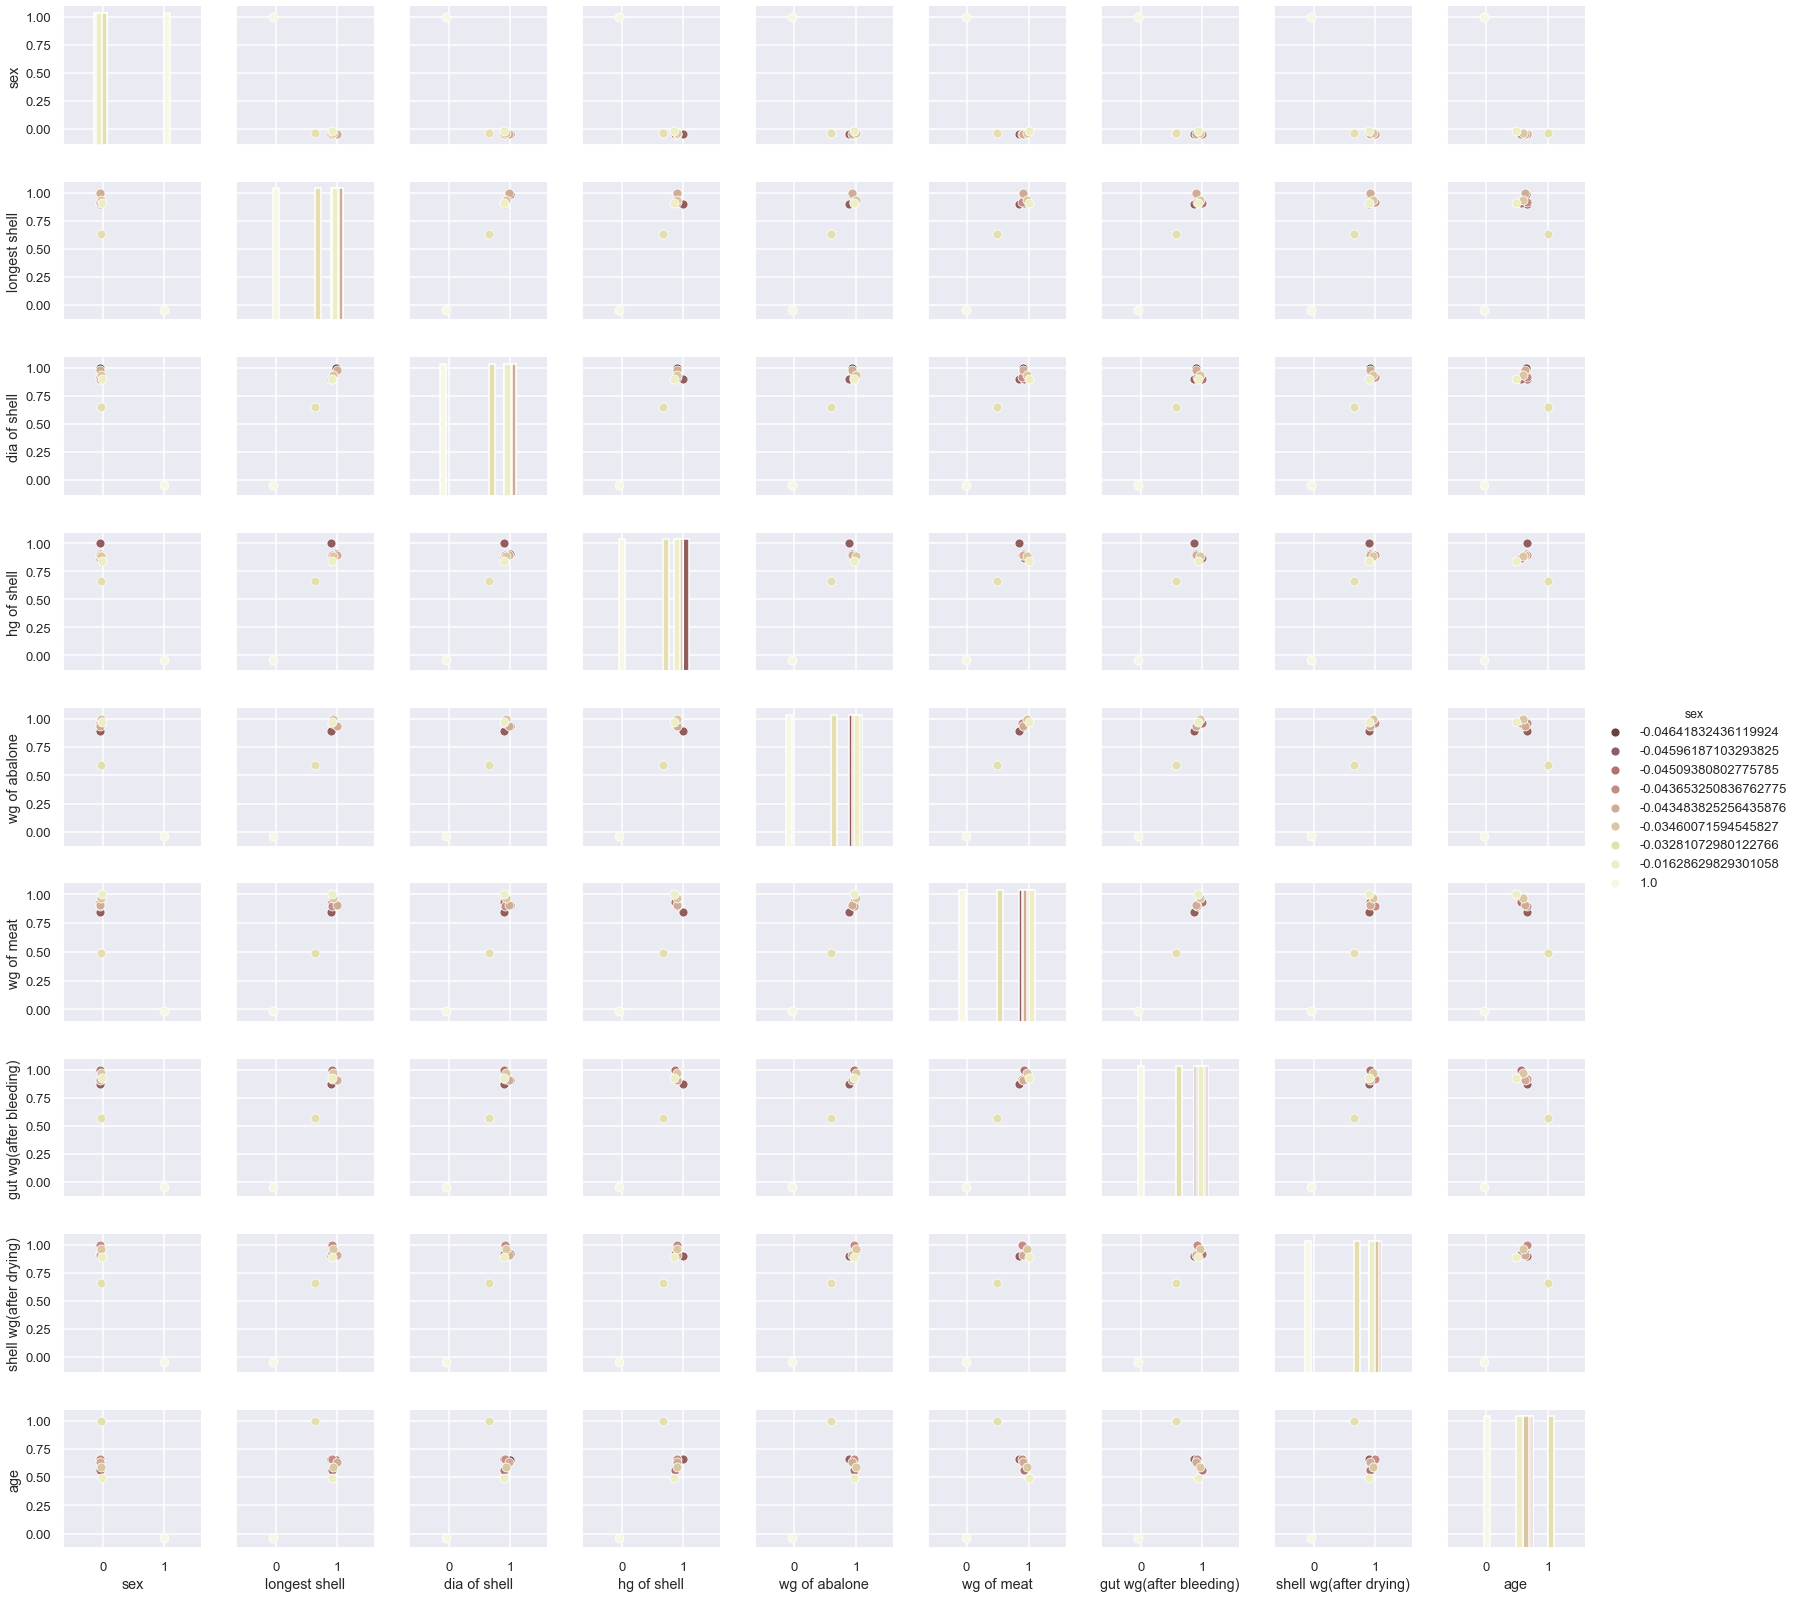

In [51]:
#showing the corelation with a pairplot
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=0.8)
sns.pairplot(abel_corr,hue='sex',palette='pink',diag_kind='hist')
plt.show()

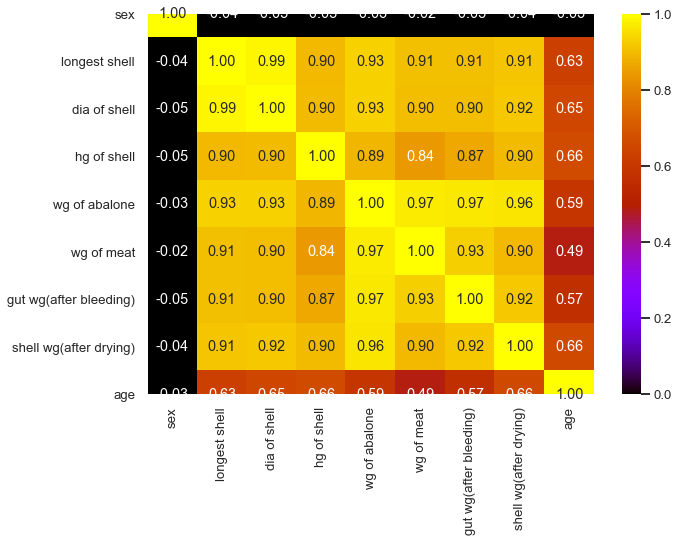

In [52]:
#showing the corelation with a heatmap
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=0.8)
sns.heatmap(abel_corr,annot=True,fmt='.2f',vmax=1,vmin=0,cmap='gnuplot')
plt.show()

as sex column is behaving negatively we can drop it

In [53]:
abel.drop(['sex'],inplace=True,axis=1)

In [54]:
abel

,longest shell,dia of shell,hg of shell,wg of abalone,wg of meat,gut wg(after bleeding),shell wg(after drying),age
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2.251292
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,2.442347
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2.525729
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,2.251292
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,2.351375
...,...,...,...,...,...,...,...,...
4171,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,2.602690
4172,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2.525729
4173,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2.442347
4174,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,2.525729


In [55]:
x=abel.iloc[:,0:7]
x

,longest shell,dia of shell,hg of shell,wg of abalone,wg of meat,gut wg(after bleeding),shell wg(after drying)
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200
...,...,...,...,...,...,...,...
4171,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4172,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4173,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4174,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [56]:
y=abel.iloc[:,-1]
y

0       2.251292
1       2.442347
2       2.525729
3       2.251292
4       2.351375
          ...   
4171    2.602690
4172    2.525729
4173    2.442347
4174    2.525729
4175    2.674149
Name: age, Length: 4026, dtype: float64

In [57]:
ss=StandardScaler()
x=ss.fit_transform(x)
print(x,'\n\n shape of x=', x.shape)

[[-1.47537569 -1.4630816  -1.30215378 ... -1.20946495 -1.23121071
  -1.25609554]
 [ 0.07761977  0.15317433 -0.08171301 ... -0.4487945  -0.33129455
  -0.16177378]
 [-0.69887796 -0.42033584 -0.35292207 ... -0.64744092 -0.59739879
  -0.5916859 ]
 ...
 [ 0.68156245  0.72668449  1.8167504  ...  0.85451982  1.08147705
   0.60425146]
 [ 0.89725626  0.83095907  0.32510058 ...  0.88116752  0.82504933
   0.51045245]
 [ 1.63061523  1.5608811   1.54554134 ...  2.88943439  1.94268714
   2.06595267]] 

 shape of x= (4026, 7)


In [58]:
y=np.array(y)
print(y.shape)

(4026,)


In [59]:
y=y.reshape(-1,1)
print(y.shape)

(4026, 1)


standardScaler on x is used to standardise all the values of all attributes in a range of -1 and 1.
y is converted to a numpy array and reshaped to the form of multiple row one column

In [60]:
#importing important libraries for modelling
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [61]:
def mo(mod,x,y):
    max_r=0
    for i in range(30,150):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
        mod.fit(x_train,y_train)
        pred=mod.predict(x_test)
        r2score=r2_score(y_test,pred)
        MAE= mean_absolute_error(y_test,pred)
        MSE= mean_squared_error(y_test,pred)
        RMSE=np.sqrt(MSE)
        if r2score > max_r:
            max_r=r2score
            random_state=i
    print('the random state at ', mod,'\nis: ',random_state, 
          '\nand it produces \n r2 score of ',r2score,
          '\n mean abs error value of ', MAE,
          '\n mean squared error value of',MSE,
          '\n & root mean sq error ', RMSE)
    return random_state

In [62]:
#LinearRegression()
lr=LinearRegression()
mo(lr,x,y)

the random state at  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 
is:  95 
and it produces 
 r2 score of  0.5501405902688312 
 mean abs error value of  0.11845194464492023 
 mean squared error value of 0.023071207032532164 
 & root mean sq error  0.1518920900920524


95

In [63]:
#checking for over/under fitting using cross_val_score
lr_scr=cross_val_score(lr,x,y,cv=30,scoring='r2')
print('the r2 score at liner regression model is=', lr_scr.mean())

the r2 score at liner regression model is= 0.4145136325572423


In [64]:
#decisiontreeregressor
dtr=DecisionTreeRegressor()
dtr_para={'criterion':['mse','friedman_mse', 'mae'],'max_depth':[3,4,5]}
dtr_grid=GridSearchCV(dtr,dtr_para,cv=30)
dtr_grid.fit(x,y)
dtr_grid.best_params_

{'criterion': 'mae', 'max_depth': 5}

In [66]:
dtr=DecisionTreeRegressor(criterion='mse',max_depth=5)
mo(dtr,x,y)

the random state at  DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') 
is:  139 
and it produces 
 r2 score of  0.5363020737970947 
 mean abs error value of  0.11823711932866252 
 mean squared error value of 0.023780920493307236 
 & root mean sq error  0.15421063677096739


139

In [67]:
#checking for over/under fitting using cross_val_score
dtr_scr=cross_val_score(dtr,x,y,cv=30,scoring='r2')
print('the r2 score at DTR model is=', dtr_scr.mean())

the r2 score at DTR model is= 0.39552321387756656


In [68]:
#KNeighborsRegressor()
knr=KNeighborsRegressor()
k_para={'n_neighbors': range(4,20),'algorithm':['ball_tree', 'kd_tree', 'brute']}
k_grid=GridSearchCV(knr,k_para,cv=30)
k_grid.fit(x,y)
k_grid.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 18}

In [69]:
knr=KNeighborsRegressor(algorithm='ball_tree',n_neighbors=18)
mo(knr,x,y)

the random state at  KNeighborsRegressor(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                    weights='uniform') 
is:  95 
and it produces 
 r2 score of  0.5673276937362678 
 mean abs error value of  0.11480591462047937 
 mean squared error value of 0.022189760043074408 
 & root mean sq error  0.1489622772485518


95

In [70]:
#checking for over/under fitting using cross_val_score
knr_scr=cross_val_score(knr,x,y,cv=30,scoring='r2')
print('the r2 score at KNR model is=', knr_scr.mean())

the r2 score at KNR model is= 0.4708476731066459


In [71]:
#SVR
svr=SVR()
svr_para={'kernel':['rbf','poly','linear'],'gamma':[0.01,0.1]}
svr_grid=GridSearchCV(svr,svr_para,cv=30)
svr_grid.fit(x,y)
svr_grid.best_params_

{'gamma': 0.1, 'kernel': 'rbf'}

In [72]:
svr=SVR(kernel='rbf',gamma=0.01)
mo(svr,x,y)


the random state at  SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 
is:  95 
and it produces 
 r2 score of  0.5869068876027246 
 mean abs error value of  0.11264049985121657 
 mean squared error value of 0.021185633808406892 
 & root mean sq error  0.1455528557205488


95

In [73]:
#checking for over/under fitting using cross_val_score
svr_scr=cross_val_score(svr,x,y,cv=30,scoring='r2')
print('the r2 score at SVR model is=', svr_scr.mean())

the r2 score at SVR model is= 0.4811644107381582


In [74]:
#WE GOT ALL THE RANDOM STATE,R2_SCORE,MAE,MSE,RMSE FROM THE ABOVE ALGORITHMS & NOW PUTTING THEM IN ONE DATAFRAME FOR PROPER VISUALIZATION

info=[['LINEAR REGRESSION',95,0.55, 0.11845194464492023 ,0.023071207032532164 ,0.1518920900920524],
      ['Decision Tree Regressor',139, 0.53,0.11823711932866257,0.02378092049330723 ,0.15421063677096736 ],
      ['KNeighborsRegressor',95,0.56, 0.11480591462047937,0.022189760043074408, 0.1489622772485518 ],
      ['SVR',95,0.58, 0.11264049985121657, 0.021185633808406892,0.1455528557205488]]
perf=pd.DataFrame(info,columns=['MODEL_NAME','RANDOM_ST','R2_SCORE','MAE','MSE','RMSE'])
perf


,MODEL_NAME,RANDOM_ST,R2_SCORE,MAE,MSE,RMSE
0,LINEAR REGRESSION,95,0.55,0.118452,0.023071,0.151892
1,Decision Tree Regressor,139,0.53,0.118237,0.023781,0.154211
2,KNeighborsRegressor,95,0.56,0.114806,0.022190,0.148962
3,SVR,95,0.58,0.112640,0.021186,0.145553


In [75]:
rfr=RandomForestRegressor()
rfr_para={"n_estimators":[300,500],'max_depth':[5,8,9]}
rfr_grid=GridSearchCV(rfr,rfr_para,cv=20)
rfr_grid.fit(x,y)
rfr_grid.best_params_

{'max_depth': 9, 'n_estimators': 300}

In [77]:
rfr=RandomForestRegressor(n_estimators=300,max_depth=9)
mo(rfr,x,y)

the random state at  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) 
is:  78 
and it produces 
 r2 score of  0.6013917125156554 
 mean abs error value of  0.1106674325737035 
 mean squared error value of 0.02044277417900421 
 & root mean sq error  0.1429782297379717


78

In [78]:
#checking for over/under fitting using cross_val_score
rfr_scr=cross_val_score(rfr,x,y,cv=30,scoring='r2')
print('the r2 score at RFR model is=', rfr_scr.mean())

the r2 score at RFR model is= 0.48145774601578845


In [79]:
gbr=GradientBoostingRegressor()

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=85)
gbr_para= {"learning_rate": [0.0001,0.02],"n_estimators":[250,500,750]}
gb_grid= GridSearchCV(gbr,gbr_para,cv=30)
gb_grid.fit(x_train,y_train)
print("best parameters:", gb_grid.best_params_)
print("\n best score:",gb_grid.best_score_)

best parameters: {'learning_rate': 0.02, 'n_estimators': 750}

 best score: 0.5913957479829547


In [81]:
gbr=GradientBoostingRegressor(learning_rate=0.02,n_estimators=750)
mo(gbr,x,y)

the random state at  GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.02, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=750,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 
is:  139 
and it produces 
 r2 score of  0.5918976206724118 
 mean abs error value of  0.11195874130019214 
 mean squared error value of 0.020929682207964293 
 & root mean sq error  0.1446709445879313


139

In [84]:
from sklearn.ensemble import AdaBoostRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=85)
svr=SVR(kernel='rbf',gamma=0.01)
para={'n_estimators':(50,70),'learning_rate':(1.0,0.001,0.1)}
abr=AdaBoostRegressor(base_estimator=svr)
abr_grid=GridSearchCV(abr,para,cv=30)
abr_grid.fit(x_train,y_train)
print("best parameters:", abr_grid.best_params_)
print("\n best score:",abr_grid.best_score_)


best parameters: {'learning_rate': 0.1, 'n_estimators': 50}

 best score: 0.596159988846117


In [86]:
svr=SVR(kernel='rbf',gamma=0.01)
abr=AdaBoostRegressor(base_estimator=svr,learning_rate=0.1,n_estimators=50)
mo(abr,x,y)

the random state at  AdaBoostRegressor(base_estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                     epsilon=0.1, gamma=0.01, kernel='rbf',
                                     max_iter=-1, shrinking=True, tol=0.001,
                                     verbose=False),
                  learning_rate=0.1, loss='linear', n_estimators=50,
                  random_state=None) 
is:  95 
and it produces 
 r2 score of  0.5920068869186517 
 mean abs error value of  0.11305330947493974 
 mean squared error value of 0.020924078447913625 
 & root mean sq error  0.14465157602982978


95

so from the above tabulation and the ensemble processes it is clear that
ABR with SVR as base_estimator is giving best result among all the other model created
so we can use ABR model as our final model

In [88]:
#saving the model
import joblib

In [89]:
joblib.dump(abr,'ABALONE_abr.pkl')

['ABALONE_abr.pkl']